## Library

In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))


def wildeford_max_gdp_frac():
    small_project = sq.lognorm(1 / (250*K), 1 / (3*K))
    modern_megaproject = sq.lognorm(1/K, 1/600)
    old_form_megaproject = sq.lognorm(1/K, 1/150)
    gigaproject = sq.lognorm(1/150, 1/50)
    
    r_ = random.random()
    if r_ < 0.1:
        gdp_frac = small_project
        percent_spent_on_compute = sq.lognorm(0.5, 0.95, lclip=0.1, rclip=0.999)
    elif r_ < 0.7:
        gdp_frac = modern_megaproject
        percent_spent_on_compute = sq.lognorm(0.7, 0.95, lclip=0.1, rclip=0.999)
    elif r_ < 0.9:
        gdp_frac = old_form_megaproject
        percent_spent_on_compute = sq.lognorm(0.85, 0.95, lclip=0.1, rclip=0.999)
    else:
        gdp_frac = gigaproject
        percent_spent_on_compute = sq.lognorm(0.85, 0.99, lclip=0.1, rclip=0.999)
        
    models_trained_per_year_for_budget = sq.lognorm(1, 10)

    return ~gdp_frac * ~percent_spent_on_compute / ~models_trained_per_year_for_budget


variables = {'initial_gdp': 23*T,
            'tai_flop_size': sq.sample(load_cache_file='caches/meta_anchor'),  # Cache generated in "Anchors" notebook
            'algo_doubling_rate_max': 3.5,
            'algo_doubling_rate_min': 2,
            'min_reduction': 2, # TODO: Connect to efficiency within tai_flop_size / should correlate with tai_flop_size
            'max_reduction': 5,
            'initial_flops_per_dollar': 18.3,
            'flops_halving_rate': 2.5,
            'max_flops_per_dollar': 24,
            'initial_pay': sq.mixture([7.2, sq.lognorm(7.2, 8, lclip=7.2)], weights=0.8),  # https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=555410569
            'gdp_growth': sq.lognorm(1.01, 1.035),
            'max_gdp_frac': wildeford_max_gdp_frac, # TODO: Willingness to spend connected to commercialization
            'spend_doubling_time': sq.norm(1.5, 2.5),
            'initial_chance_of_nonscaling_issue': 0.9,
            'final_chance_of_nonscaling_issue': 0.3,
            'nonscaling_issue_bottom_year': 2040,
            'nonscaling_delay': sq.mixture([sq.lognorm(2, 5), sq.lognorm(10, 40)], weights=0.9)}

print('Loaded')


Loaded


## Run Wildeford timelines model

## TAI FLOP SIZE ##
{1: 19.7,
 5: 24.4,
 10: 25.4,
 20: 27.0,
 30: 28.8,
 40: 30.6,
 50: 32.4,
 60: 34.4,
 70: 36.5,
 80: 39.0,
 90: 42.6,
 95: 45.7,
 99: 51.8}


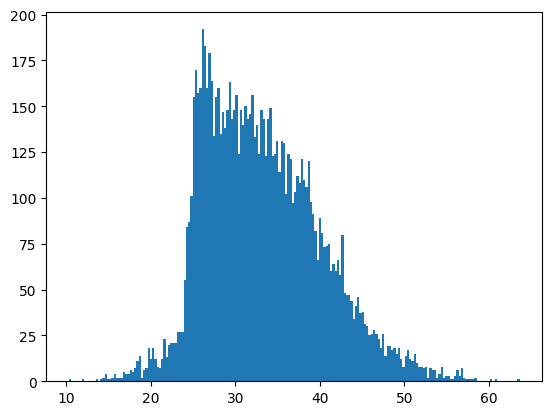

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOPS PER DOLLAR: 18.3 ##
-
## FLOPS HALVING RATE: 2.5 ##
-
## MAX FLOPS PER DOLLAR: 24 ##
-
## INITIAL PAY ##
{1: 7.2,
 5: 7.2,
 10: 7.2,
 20: 7.2,
 30: 7.2,
 40: 7.2,
 50: 7.2,
 60: 7.2,
 70: 7.2,
 80: 7.2,
 90: 7.6,
 95: 7.7,
 99: 8.0}


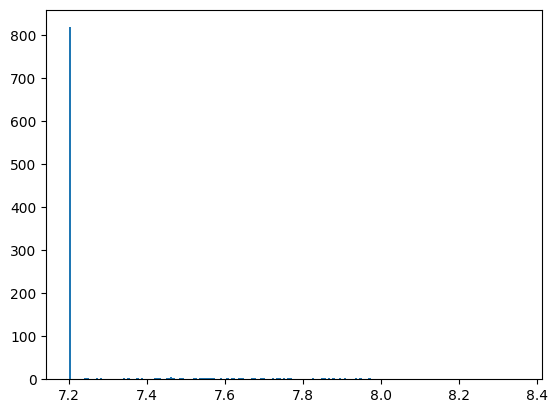

-
-
## GDP GROWTH ##
{1: 1.01,
 5: 1.01,
 10: 1.01,
 20: 1.02,
 30: 1.02,
 40: 1.02,
 50: 1.02,
 60: 1.02,
 70: 1.03,
 80: 1.03,
 90: 1.03,
 95: 1.04,
 99: 1.04}


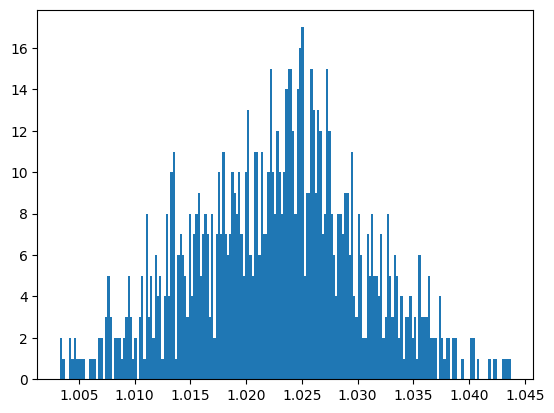

-
-
## MAX GDP FRAC ##
{1: 0.0,
 5: 1e-05,
 10: 7e-05,
 20: 0.00016,
 30: 0.00024,
 40: 0.0003,
 50: 0.00038,
 60: 0.00051,
 70: 0.00068,
 80: 0.00101,
 90: 0.00214,
 95: 0.00363,
 99: 0.00807}


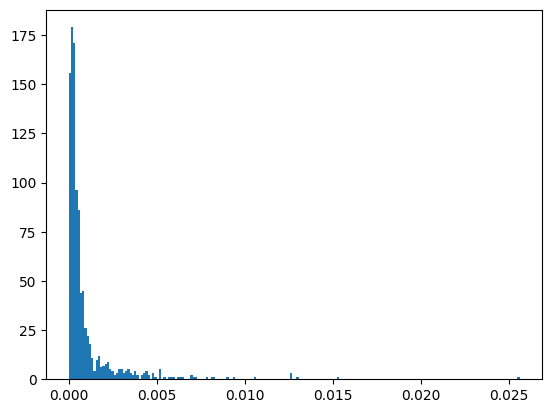

-
-
## SPEND DOUBLING TIME ##
{1: 2.7,
 5: 2.5,
 10: 2.4,
 20: 2.2,
 30: 2.1,
 40: 2.1,
 50: 2.0,
 60: 1.9,
 70: 1.8,
 80: 1.7,
 90: 1.6,
 95: 1.5,
 99: 1.3}


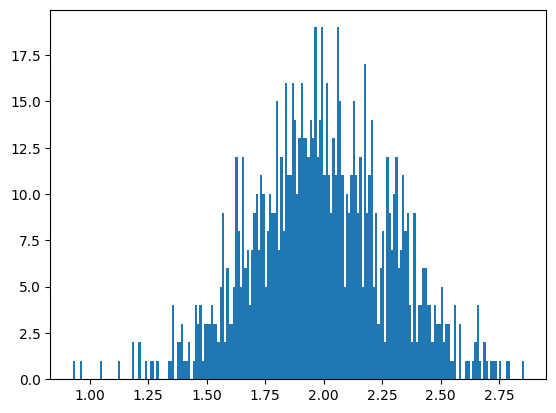

-
-
-
-
## GDP Over Time ##


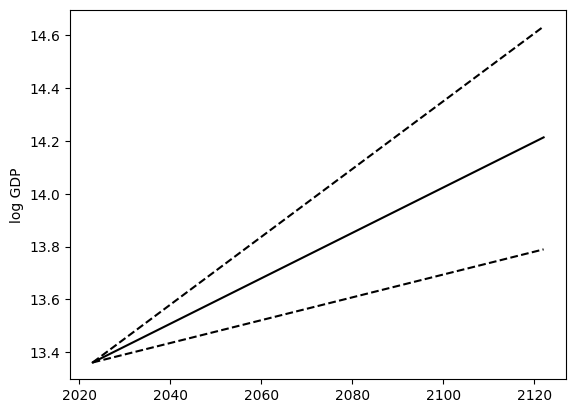

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~25 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~25 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~25 trillion) - 13.5 (~30 trillion)
Year: 2033

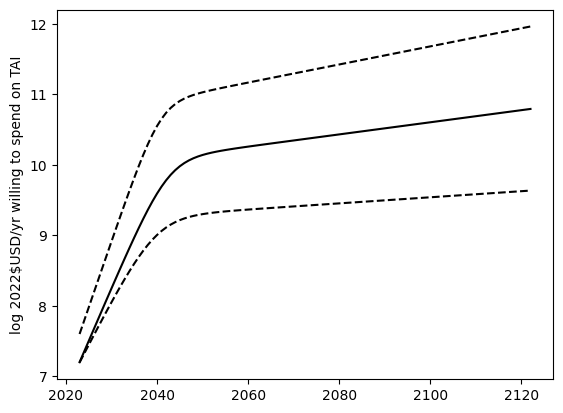

Year: 2023 - willingness log 2022$USD per year 7.2 (~16 million) 90% CI 7.2 (~16 million) - 7.6 (~40 million)
Year: 2024 - willingness log 2022$USD per year 7.3 (~22 million) 90% CI 7.3 (~21 million) - 7.8 (~61 million)
Year: 2025 - willingness log 2022$USD per year 7.5 (~32 million) 90% CI 7.4 (~28 million) - 8.0 (~95 million)
Year: 2026 - willingness log 2022$USD per year 7.6 (~45 million) 90% CI 7.6 (~37 million) - 8.2 (~146 million)
Year: 2027 - willingness log 2022$USD per year 7.8 (~63 million) 90% CI 7.7 (~49 million) - 8.4 (~224 million)
Year: 2028 - willingness log 2022$USD per year 7.9 (~89 million) 90% CI 7.8 (~65 million) - 8.5 (~345 million)
Year: 2029 - willingness log 2022$USD per year 8.1 (~125 million) 90% CI 7.9 (~85 million) - 8.7 (~531 million)
Year: 2030 - willingness log 2022$USD per year 8.2 (~176 million) 90% CI 8.0 (~112 million) - 8.9 (~815 million)
Year: 2031 - willingness log 2022$USD per year 8.4 (~247 million) 90% CI 8.2 (~146 million) - 9.1 (~1 billion)
Y

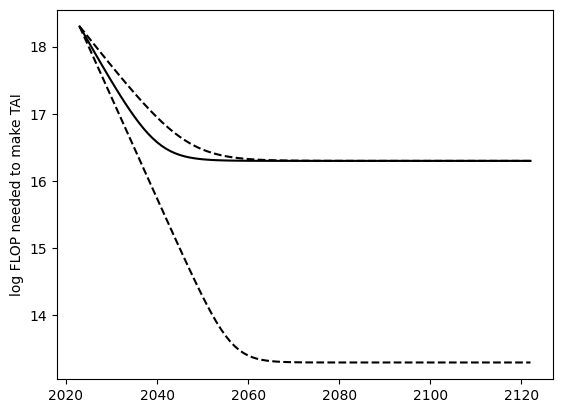

Year: 2023 - log FLOP needed for TAI 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP needed for TAI 18.2 (~2 quintillion) 90% CI 18.2 (~2 quintillion) - 18.1 (~1 quintillion)
Year: 2025 - log FLOP needed for TAI 18.1 (~1 quintillion) 90% CI 18.1 (~1 quintillion) - 18.0 (~998 quadrillion)
Year: 2026 - log FLOP needed for TAI 17.9 (~888 quadrillion) 90% CI 18.0 (~1 quintillion) - 17.8 (~705 quadrillion)
Year: 2027 - log FLOP needed for TAI 17.8 (~678 quadrillion) 90% CI 18.0 (~924 quadrillion) - 17.7 (~499 quadrillion)
Year: 2028 - log FLOP needed for TAI 17.7 (~519 quadrillion) 90% CI 17.9 (~761 quadrillion) - 17.5 (~353 quadrillion)
Year: 2029 - log FLOP needed for TAI 17.6 (~398 quadrillion) 90% CI 17.8 (~628 quadrillion) - 17.4 (~249 quadrillion)
Year: 2030 - log FLOP needed for TAI 17.5 (~306 quadrillion) 90% CI 17.7 (~519 quadrillion) - 17.2 (~176 quadrillion)
Year: 2031 - log FLOP needed for TAI 17.4 (~237 quadrillion) 90% CI 17.6 (

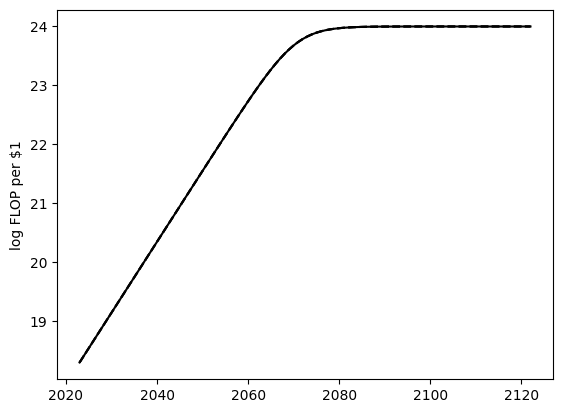

Year: 2023 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP per 2022$1USD 18.4 (~3 quintillion) 90% CI 18.4 (~3 quintillion) - 18.4 (~3 quintillion)
Year: 2025 - log FLOP per 2022$1USD 18.5 (~3 quintillion) 90% CI 18.5 (~3 quintillion) - 18.5 (~3 quintillion)
Year: 2026 - log FLOP per 2022$1USD 18.7 (~5 quintillion) 90% CI 18.7 (~5 quintillion) - 18.7 (~5 quintillion)
Year: 2027 - log FLOP per 2022$1USD 18.8 (~6 quintillion) 90% CI 18.8 (~6 quintillion) - 18.8 (~6 quintillion)
Year: 2028 - log FLOP per 2022$1USD 18.9 (~8 quintillion) 90% CI 18.9 (~8 quintillion) - 18.9 (~8 quintillion)
Year: 2029 - log FLOP per 2022$1USD 19.0 (~11 quintillion) 90% CI 19.0 (~11 quintillion) - 19.0 (~11 quintillion)
Year: 2030 - log FLOP per 2022$1USD 19.1 (~14 quintillion) 90% CI 19.1 (~14 quintillion) - 19.1 (~14 quintillion)
Year: 2031 - log FLOP per 2022$1USD 19.3 (~18 quintillion) 90% CI 19.3 (~18 quintillion) - 19.3 (~18 quint

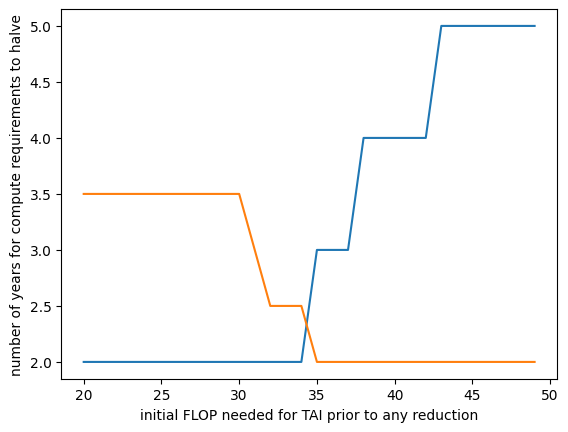

TAI log FLOP 20 -> algo doubling rate 3.5yrs
TAI log FLOP 21 -> algo doubling rate 3.5yrs
TAI log FLOP 22 -> algo doubling rate 3.5yrs
TAI log FLOP 23 -> algo doubling rate 3.5yrs
TAI log FLOP 24 -> algo doubling rate 3.5yrs
TAI log FLOP 25 -> algo doubling rate 3.5yrs
TAI log FLOP 26 -> algo doubling rate 3.5yrs
TAI log FLOP 27 -> algo doubling rate 3.5yrs
TAI log FLOP 28 -> algo doubling rate 3.5yrs
TAI log FLOP 29 -> algo doubling rate 3.5yrs
TAI log FLOP 30 -> algo doubling rate 3.5yrs
TAI log FLOP 31 -> algo doubling rate 3.0yrs
TAI log FLOP 32 -> algo doubling rate 2.5yrs
TAI log FLOP 33 -> algo doubling rate 2.5yrs
TAI log FLOP 34 -> algo doubling rate 2.5yrs
TAI log FLOP 35 -> algo doubling rate 2.0yrs
TAI log FLOP 36 -> algo doubling rate 2.0yrs
TAI log FLOP 37 -> algo doubling rate 2.0yrs
TAI log FLOP 38 -> algo doubling rate 2.0yrs
TAI log FLOP 39 -> algo doubling rate 2.0yrs
TAI log FLOP 40 -> algo doubling rate 2.0yrs
TAI log FLOP 41 -> algo doubling rate 2.0yrs
TAI log FL

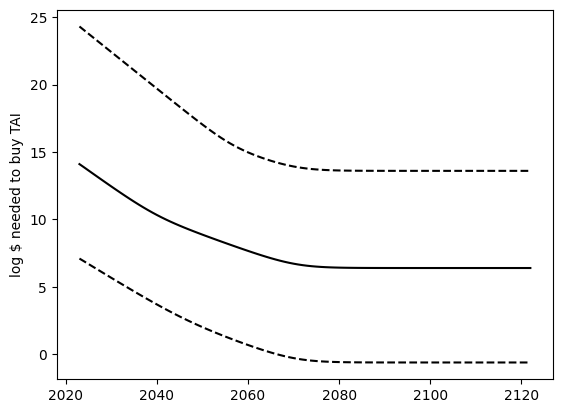

Year: 2023 - 14.1 log 2022$USD to buy TAI (~126 trillion) 90% CI 7.1 (~13 million) - 24.3 (~2 septillion)
Year: 2024 - 13.9 log 2022$USD to buy TAI (~73 trillion) 90% CI 6.9 (~8 million) - 24.0 (~1 septillion)
Year: 2025 - 13.6 log 2022$USD to buy TAI (~42 trillion) 90% CI 6.7 (~5 million) - 23.8 (~573 sextillion)
Year: 2026 - 13.4 log 2022$USD to buy TAI (~24 trillion) 90% CI 6.5 (~3 million) - 23.5 (~307 sextillion)
Year: 2027 - 13.1 log 2022$USD to buy TAI (~14 trillion) 90% CI 6.3 (~2 million) - 23.2 (~165 sextillion)
Year: 2028 - 12.9 log 2022$USD to buy TAI (~8 trillion) 90% CI 6.1 (~1 million) - 22.9 (~88 sextillion)
Year: 2029 - 12.7 log 2022$USD to buy TAI (~5 trillion) 90% CI 5.9 (~751 thousand) - 22.7 (~47 sextillion)
Year: 2030 - 12.4 log 2022$USD to buy TAI (~3 trillion) 90% CI 5.7 (~470 thousand) - 22.4 (~25 sextillion)
Year: 2031 - 12.2 log 2022$USD to buy TAI (~2 trillion) 90% CI 5.5 (~295 thousand) - 22.1 (~14 sextillion)
Year: 2032 - 12.0 log 2022$USD to buy TAI (~960

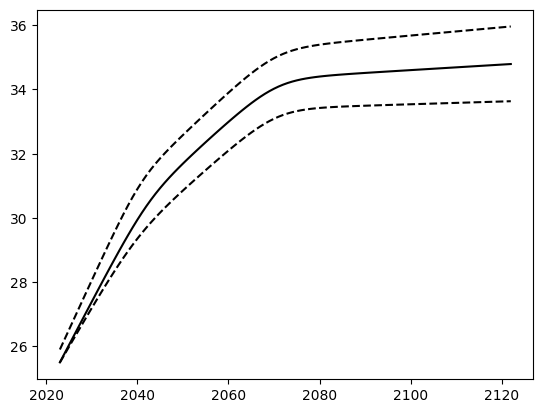

Year: 2023 - max log FLOP 25.5 (~32 septillion) 90% CI 25.5 (~31 septillion) - 25.9 (~79 septillion)
Year: 2024 - max log FLOP 25.8 (~59 septillion) 90% CI 25.7 (~55 septillion) - 26.2 (~161 septillion)
Year: 2025 - max log FLOP 26.0 (~110 septillion) 90% CI 26.0 (~96 septillion) - 26.5 (~328 septillion)
Year: 2026 - max log FLOP 26.3 (~204 septillion) 90% CI 26.2 (~169 septillion) - 26.8 (~668 septillion)
Year: 2027 - max log FLOP 26.6 (~381 septillion) 90% CI 26.5 (~295 septillion) - 27.1 (~1 octillion)
Year: 2028 - max log FLOP 26.9 (~709 septillion) 90% CI 26.7 (~516 septillion) - 27.4 (~3 octillion)
Year: 2029 - max log FLOP 27.1 (~1 octillion) 90% CI 27.0 (~897 septillion) - 27.7 (~6 octillion)
Year: 2030 - max log FLOP 27.4 (~2 octillion) 90% CI 27.2 (~2 octillion) - 28.1 (~11 octillion)
Year: 2031 - max log FLOP 27.7 (~5 octillion) 90% CI 27.4 (~3 octillion) - 28.4 (~23 octillion)
Year: 2032 - max log FLOP 27.9 (~8 octillion) 90% CI 27.7 (~5 octillion) - 28.7 (~46 octillion)
Ye

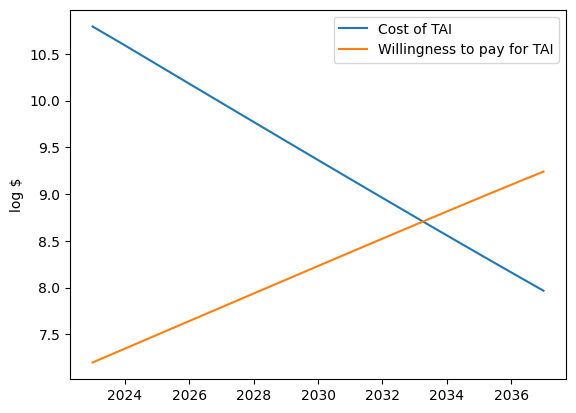

## SAMPLE RUN 2 ##
It takes 26.6 log FLOP (~387 septillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are willing to pay 7.3 log 2022$USD (~21 million) and this increases by 1.8x per year to a max of 0.0015% of GDP. GDP grows at a rate of 1.025x per year.
If a non-scaling delay happens, it will take an additional 2.5 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 25.6 max log FLOP (42 septillion) available - TAI takes 26.6 log FLOP (387 septillion) - log $ 8.3 to buy TAI (194 million) vs. willingness to pay log $ 7.3 (21 million) - 18.3 log FLOPS per $ (2 quintillion)
Year: 2024 - 25.9 max log FLOP (83 septillion) available - TAI takes 26.5 log FLOP (321 septillion) - log $ 8.1 to buy TAI (122 million) vs. willingness to pay 

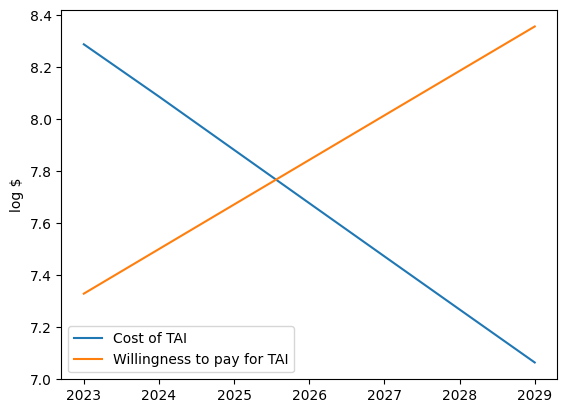

## SAMPLE RUN 3 ##
It takes 26.1 log FLOP (~116 septillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are willing to pay 7.2 log 2022$USD (~16 million) and this increases by 1.9x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.023x per year.
If a non-scaling delay happens, it will take an additional 2.9 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 25.5 max log FLOP (32 septillion) available - TAI takes 26.1 log FLOP (116 septillion) - log $ 7.8 to buy TAI (58 million) vs. willingness to pay log $ 7.2 (16 million) - 18.3 log FLOPS per $ (2 quintillion)
Year: 2024 - 25.8 max log FLOP (60 septillion) available - TAI takes 26.0 log FLOP (96 septillion) - log $ 7.6 to buy TAI (36 million) vs. willingness to pay log

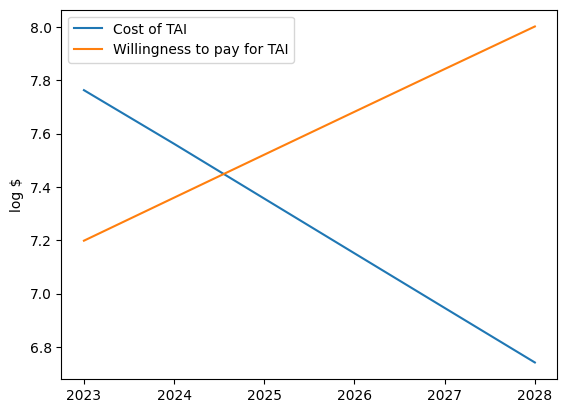

In [3]:
run_timelines_model(variables, cores=6, runs=RUNS, dump_cache_file='caches/tai_years')